# Blah Blah Blah
*By Kuanlin Chen, PhD student of the schulman lab*

*Advisor: Rebecca Schulman, PhD*

*Johns Hopkins University*

Blah Blah Blah

In [1]:
# Package Importing
import csv, math, os, time, copy, matplotlib, datetime, keras

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

from scipy import io as spio
from scipy.ndimage import gaussian_filter
from scipy.stats import bernoulli

from math import log10, floor

from skimage import transform, exposure

print(keras.__version__) # 2.4.3
print(tf.__version__) # 2.2.0

2.4.3
2.2.0


In [2]:
plt.rc('font', family = 'serif', size = 13, weight = "bold")
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', linewidth = 2)
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize = (6, 6))
plt.rc('legend', fontsize = 13)

cm = plt.cm.get_cmap('tab20')

In [3]:
# load MNIST digit dataset
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

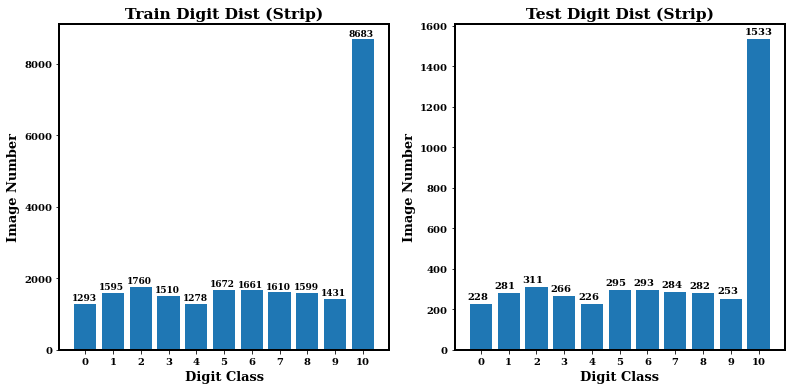

(24092, 28, 28)
(4252, 28, 28)


In [11]:
# organize and load strip digit dataset
from sklearn.model_selection import train_test_split

folder = "Deep Learning Model Data"
ver_num = 2

# # read files and save imgname and label into files with [(imgname1, label1) ...]
# files = [("/".join((folder,"digit{}".format(i),j)), i) for i in range(11) for j in os.listdir("/".join((folder,"digit{}".format(i)))) if ".DS" not in j]
# X_strip = np.zeros(shape=(len(files), 28, 28))
# y_strip = np.zeros(shape=(len(files)))
# for i in range(len(files)):
#     X_strip[i] = plt.imread(files[i][0])[:,:,0]; y_strip[i] = files[i][1]


# # read files and save imgname and label into files with [(imgname1, label1) ...]
# files = [("/".join((folder,"digit{}".format(i),j)), i) for i in range(10) for j in os.listdir("/".join((folder,"digit{}".format(i)))) if ".DS" not in j]
# X_strip_1 = np.zeros(shape=(len(files), 28, 28))
# y_strip_1 = np.zeros(shape=(len(files)))
# for i in range(len(files)):
#     X_strip_1[i] = plt.imread(files[i][0])[:,:,0]; y_strip_1[i] = files[i][1]
# # rotate random squiggle images
# files = [("/".join((folder,"digit{}".format(i),j)), i) for i in range(10, 11) for j in os.listdir("/".join((folder,"digit{}".format(i)))) if ".DS" not in j]
# X_strip_2 = np.zeros(shape=(len(files)*4, 28, 28))
# y_strip_2 = np.zeros(shape=(len(files)*4)); ctr = 0
# for i in range(len(files)):
#     X_strip_2[ctr] = plt.imread(files[i][0])[:,:,0]; y_strip_2[ctr] = files[i][1]
#     X_strip_2[ctr+1] = np.rot90(plt.imread(files[i][0])[:,:,0],1); y_strip_2[ctr+1] = files[i][1]
#     X_strip_2[ctr+2] = np.rot90(plt.imread(files[i][0])[:,:,0],2); y_strip_2[ctr+2] = files[i][1]
#     X_strip_2[ctr+3] = np.rot90(plt.imread(files[i][0])[:,:,0],3); y_strip_2[ctr+3] = files[i][1]
#     ctr += 4
# X_strip = np.concatenate((X_strip_1, X_strip_2))
# y_strip = np.concatenate((y_strip_1, y_strip_2))


# X_train_strip, X_test_strip, y_train_strip, y_test_strip = train_test_split(X_strip, y_strip,\
#                                                     test_size = 0.15, random_state = 89,\
#                                                     stratify = y_strip, shuffle = True)

# np.save(folder+"/X_train_strip_v{}.npy".format(ver_num), X_train_strip)
# np.save(folder+"/X_test_strip_v{}.npy".format(ver_num), X_test_strip)
# np.save(folder+"/y_train_strip_v{}.npy".format(ver_num), y_train_strip)
# np.save(folder+"/y_test_strip_v{}.npy".format(ver_num), y_test_strip)

# load .npy data
X_train_strip = np.load(folder+"/X_train_strip_v{}.npy".format(ver_num))
X_test_strip = np.load(folder+"/X_test_strip_v{}.npy".format(ver_num))
y_train_strip = np.load(folder+"/y_train_strip_v{}.npy".format(ver_num))
y_test_strip = np.load(folder+"/y_test_strip_v{}.npy".format(ver_num))

fig = plt.figure(figsize = (13, 6))
plt.subplot(1, 2, 1)
y , x = np.histogram(y_train_strip, bins = range(12))
plt.bar(range(11), y)
plt.title("Train Digit Dist (Strip)", weight = "bold")
plt.xlabel("Digit Class", weight = "bold")
plt.xticks(range(11), weight = "bold")
plt.ylabel("Image Number", weight = "bold")
for i, v, in enumerate(y):
    plt.text(i-.5, v+100, str(v), fontsize = 9)
plt.subplot(1, 2, 2)
y , x = np.histogram(y_test_strip, bins = range(12))
plt.bar(range(11), y)
plt.title("Test Digit Dist (Strip)", weight = "bold")
plt.xlabel("Digit Class", weight = "bold")
plt.xticks(range(11), weight = "bold")
plt.ylabel("Image Number", weight = "bold")
for i, v, in enumerate(y):
    plt.text(i-.5, v+25, str(v), fontsize = 10)
plt.show()

print(X_train_strip.shape)
print(X_test_strip.shape)

In [12]:
X_train_mnist = X_train_mnist / 255; X_test_mnist = X_test_mnist / 255
X_train_mnist = X_train_mnist.astype(np.float32)
X_test_mnist = X_test_mnist.astype(np.float32)
X_train_strip = X_train_strip.astype(np.float32)
X_test_strip = X_test_strip.astype(np.float32)

X_train = np.concatenate((X_train_mnist, X_train_strip))
X_test = np.concatenate((X_test_mnist, X_test_strip))
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
y_train = np.concatenate((y_train_mnist, y_train_strip))
y_test = np.concatenate((y_test_mnist, y_test_strip))
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

num_classes = y_test.shape[1]
print("Num classes is " + str(num_classes))

(84092, 28, 28, 1)
(14252, 28, 28, 1)
(84092, 11)
(14252, 11)
Num classes is 11


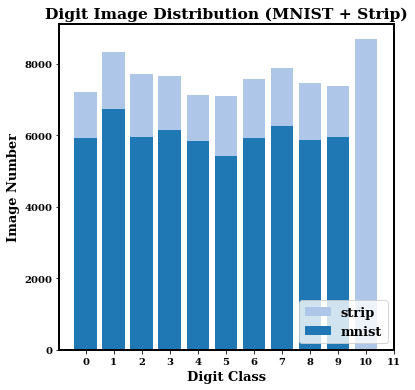

In [13]:
y , x = np.histogram(np.concatenate((y_train_mnist, y_train_strip)), bins = range(12))
plt.bar(range(11), y, color = cm.colors[1], label = "strip")
y , x = np.histogram(y_train_mnist, bins = range(11))
plt.bar(range(10), y, color = cm.colors[0], label = "mnist")
plt.title("Digit Image Distribution (MNIST + Strip)", weight = "bold")
plt.xlabel("Digit Class", weight = "bold")
plt.xticks(range(12), weight = "bold")
plt.ylabel("Image Number", weight = "bold")
plt.legend(loc=4)
plt.show()

In [14]:
model = load_model("Deep_Learning_Classifier_v1.h5")

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [17]:
# # convolutional neural network
# model = Sequential()
# model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(15, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(num_classes, activation = 'softmax'))
# # Compile model
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# filepath = "DigitClassifier_20201014_mod3.h5"

# checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
# callbacks_list = [checkpoint]

# history = model.fit(X_train, y_train,\
#                     validation_data = (X_test, y_test), epochs = 20, batch_size = 200,\
#                     callbacks = callbacks_list)



